# Diffusion and Random Walks

*14th November 2024* - **Credits:** Luca Ciandrini (luca.ciandrini@umontpellier.fr)

---
From the Feynamn's Lectures on Physics, Vol I Ch.6:
>... imagine a “game” in which a “player” starts at the point x=0 and at each “move” is required to take a step either forward (toward +x) or backward (toward −x). The choice is to be made randomly, determined, for example, by the toss of a coin. How shall we describe the resulting motion? In its general form the problem is related to the motion of atoms (or other particles) in a gas—called Brownian motion—and also to the combination of errors in measurements.

Let's try to implement that.

## Random Walks in 1D
For the sake of simplicity let's say that the displacements can be $a = \pm 1$. And let's see how the distance from the starting point evolves in time (and after $N = t/\Delta t$ total steps). Also, to start with, $k_l=k_r$.

In [12]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

k_r = k_l = 1  ## define the hopping rates for left (l) and right (r)
a = 1          ## the absolute value of displacement
delta_t = 0.01 ## the time step

t_max = 100.   ## Maximal time

t = 0.         ## initial conditions
x = 0.

T = []
T.append(t)
X = []
X.append(x)

In [14]:
## 1D random walk
def step_1D_RW(rate_left, rate_right, delta):
    
    step_x = 0
    
    prob_left = rate_left*delta
    prob_right = rate_right*delta
    
    ran = random()
    
    if ran <= prob_left:
            # step on the left
            step_x = -1
            
    if ran > prob_left and ran <= prob_left + prob_right :
            # step on the right
            step_x = +1
    
    return step_x

In [15]:
## Make the simulation till t_max
while(t<t_max):
    x += a*step_1D_RW(k_l,k_r,delta_t)
    t += delta_t
    
    T.append(t)
    X.append(x)

Text(0, 0.5, 'position $x$ [au]')

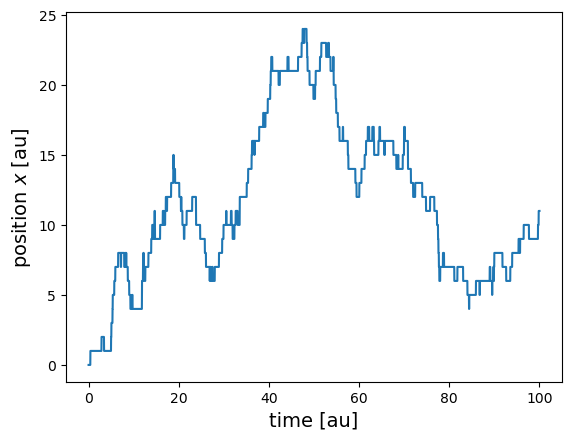

In [16]:
plt.plot(T,X)
plt.xlabel('time [au]', fontsize='14')
plt.ylabel('position $x$ [au]', fontsize='14')

In [17]:
N_realisation = 1000

T_realisation = []
X_realisation = []

for i in range(0,N_realisation):
    
    t = 0.         ## initial conditions
    x = 0.

    T = []
    T.append(t)
    X = []
    X.append(x)
    
    ## Start one realisation
    while(t<t_max):
        x += a*step_1D_RW(k_l,k_r,delta_t)
        t += delta_t
    
        T.append(t)
        X.append(x)
    ## End
    
    T_realisation.append(T)
    X_realisation.append(X)

In [6]:
X_realisation[1]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0

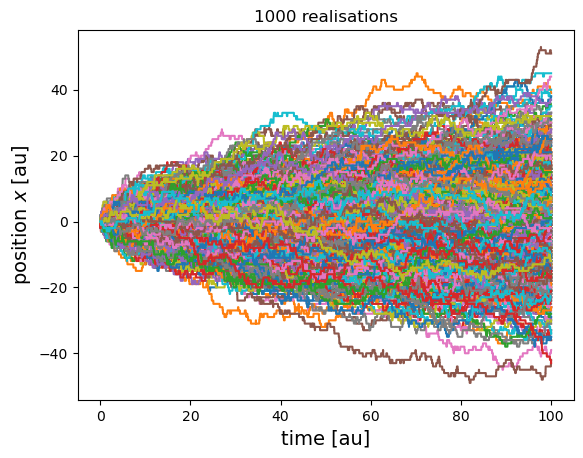

In [18]:
for i in range(0,N_realisation):
    plt.plot(T_realisation[i],X_realisation[i]) 
    

plt.xlabel('time [au]', fontsize='14')
plt.ylabel('position $x$ [au]', fontsize='14')

title = str(N_realisation) + ' realisations'
plt.title(title)
plt.show()

In [19]:
### ATTENTION. This probably needs to be fixed, run it twice or more
# Compute average and standard deviation as a function of time
sum_x  = np.empty(len(T_realisation[0]))
sum_x2 = np.empty(len(T_realisation[0]))


for X_one,T_one in zip(X_realisation, T_realisation):

    time_step = 0
    for x_individual, t_individual in zip(X_one,T_one):
        sum_x[time_step] += x_individual
        sum_x2[time_step] += x_individual*x_individual
        
        time_step += 1
    
mean_x = np.divide(sum_x, N_realisation)
var_x = np.divide(sum_x2, N_realisation)
    
     
    
    

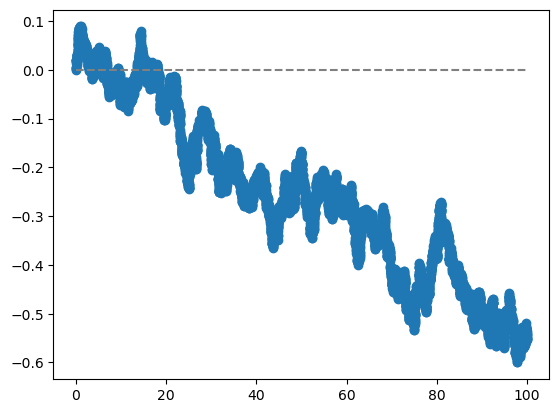

In [ ]:
%plt.plot(T_realisation[0], mean_x, 'o')
%plt.plot([0,100], [0,0],'--', color='gray')
#plt.ylim(-50,50)

In [25]:
# 

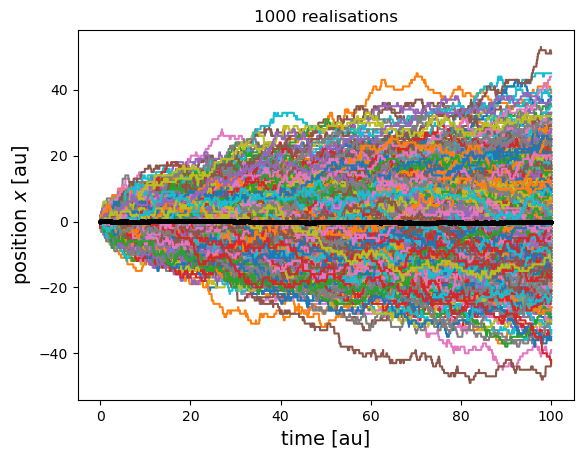

In [20]:
for i in range(0,N_realisation):
    plt.plot(T_realisation[i],X_realisation[i]) 
    

plt.xlabel('time [au]', fontsize='14')
plt.ylabel('position $x$ [au]', fontsize='14')

title = str(N_realisation) + ' realisations'

#plt.plot([0,100], [0,0],'--', color='black', lw=6)
plt.plot(T_realisation[0], mean_x, 'o', ms=2, color = 'black')

plt.title(title)
plt.show()

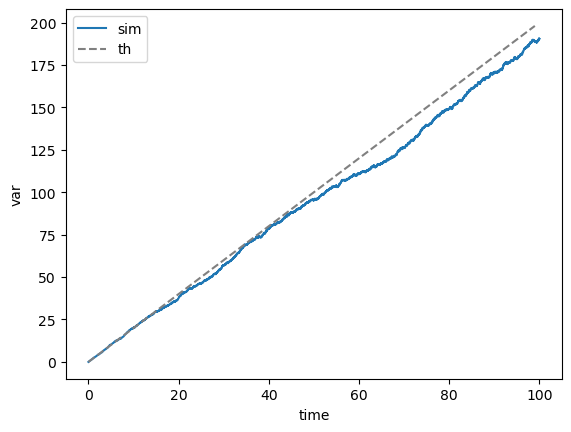

In [23]:
plt.plot(T_realisation[0], var_x,label='sim')

t_th = np.arange(0,100)
var_th = 2*a*a*k_l*t_th
plt.plot(t_th, var_th,'--', color='gray',label='th')
plt.xlabel('time')
plt.ylabel('var')
plt.legend()